In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,ElasticNet,ElasticNetCV,LassoCV,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('AIr Quality Index - City Data.csv')

In [4]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,27-06-2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28-06-2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29-06-2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30-06-2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


## 1.Data Pre-processing

In [5]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [6]:
df.shape

(29531, 16)

In [7]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [8]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,27-06-2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28-06-2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29-06-2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30-06-2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,01-07-2020,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,67.450578,64.661449,0.04,28.820,48.57,80.5900,949.99
PM10,18391.0,118.127103,90.605110,0.01,56.255,95.68,149.7450,1000.00
NO,25949.0,17.574730,22.785846,0.02,5.630,9.89,19.9500,390.68
NO2,25946.0,28.560659,24.474746,0.01,11.750,21.69,37.6200,362.21
NOx,25346.0,32.309123,31.646011,0.00,12.820,23.52,40.1275,467.63
NH3,19203.0,23.483476,25.684275,0.01,8.580,15.85,30.0200,352.89
CO,27472.0,2.248598,6.962884,0.00,0.510,0.89,1.4500,175.81
SO2,25677.0,14.531977,18.133775,0.01,5.670,9.16,15.2200,193.86
O3,25509.0,34.491430,21.694928,0.01,18.860,30.84,45.5700,257.73
Benzene,23908.0,3.280840,15.811136,0.00,0.120,1.07,3.0800,455.03


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [11]:
df["Date"]= pd.to_datetime(df["Date"])

In [12]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-02-01,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-03-01,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-04-01,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-05-01,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [14]:
df['Year'] = df['Date'].dt.year

In [15]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015
1,Ahmedabad,2015-02-01,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015
2,Ahmedabad,2015-03-01,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015
3,Ahmedabad,2015-04-01,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015
4,Ahmedabad,2015-05-01,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,2020
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,2020
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,2020
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,2020


In [16]:
(df.isnull().sum()/df.shape[0]*100)

City           0.000000
Date           0.000000
PM2.5         15.570079
PM10          37.723071
NO            12.129626
NO2           12.139785
NOx           14.171549
NH3           34.973418
CO             6.972334
SO2           13.050692
O3            13.619586
Benzene       19.041008
Toluene       27.229014
Xylene        61.322001
AQI           15.851139
AQI_Bucket    15.851139
Year           0.000000
dtype: float64

## Information Missing value

In [17]:
df['PM2.5'].mean()

67.45057794890272

In [18]:
df['PM2.5'].median()

48.57

In [19]:
df['PM10'].mean()

118.12710293078102

In [20]:
df['PM10'].median()

95.68

In [21]:
df['NO'].mean()

17.574729662029284

In [22]:
df['NO'].median()

9.89

In [23]:
df['NO2'].mean()

28.560659061126763

In [24]:
df['NO2'].median()

21.69

In [25]:
df['NOx'].mean()

32.309123333070055

In [26]:
df['NOx'].median()

23.52

In [27]:
df['NH3'].mean()

23.483476019371977

In [28]:
df['NH3'].median()

15.85

In [29]:
df['CO'].mean()

2.248598209085598

In [30]:
df['CO'].median()

0.89

In [31]:
df['SO2'].mean()

14.531977255910002

In [32]:
df['SO2'].median()

9.16

In [33]:
df['O3'].mean()

34.49143047551808

In [34]:
df['O3'].median()

30.84

In [35]:
df['O3'].describe()

count    25509.000000
mean        34.491430
std         21.694928
min          0.010000
25%         18.860000
50%         30.840000
75%         45.570000
max        257.730000
Name: O3, dtype: float64

In [36]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000,29531.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581,2017.887914
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585,1.533783
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,2015.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000,2017.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000,2018.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000,2019.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000,2020.000000


In [37]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Year'],
      dtype='object')

<AxesSubplot:xlabel='PM10'>

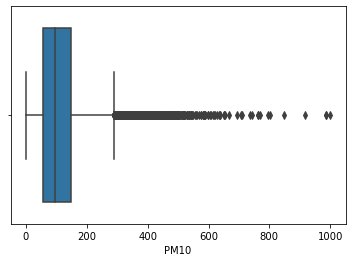

In [38]:
sns.boxplot(df['PM10'])

<AxesSubplot:xlabel='PM2.5'>

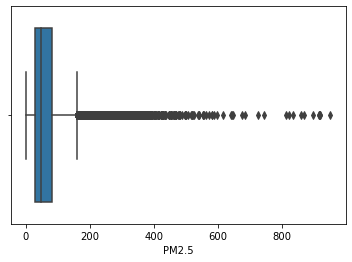

In [39]:
sns.boxplot(df['PM2.5'])

<AxesSubplot:xlabel='NO'>

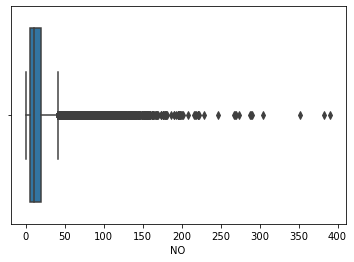

In [40]:
sns.boxplot(df['NO'])

<AxesSubplot:xlabel='NO2'>

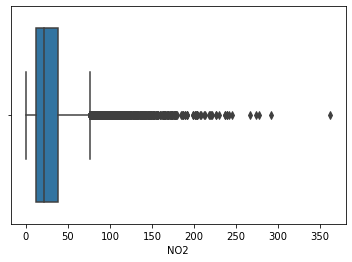

In [41]:
sns.boxplot(df['NO2'])

<AxesSubplot:xlabel='NO2'>

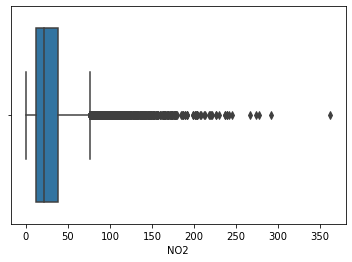

In [42]:
sns.boxplot(df['NO2'])

<AxesSubplot:xlabel='NOx'>

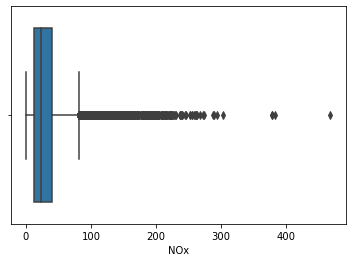

In [43]:
sns.boxplot(df['NOx'])

<AxesSubplot:xlabel='NH3'>

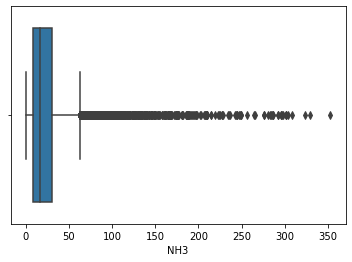

In [44]:
sns.boxplot(df['NH3'])

<AxesSubplot:xlabel='CO'>

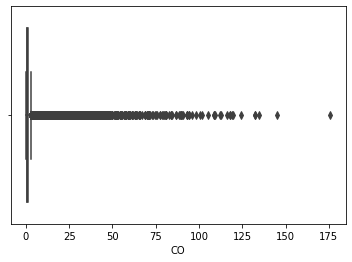

In [45]:
sns.boxplot(df['CO'])

<AxesSubplot:xlabel='SO2'>

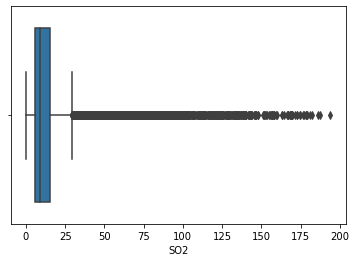

In [46]:
sns.boxplot(df['SO2'])

<AxesSubplot:xlabel='O3'>

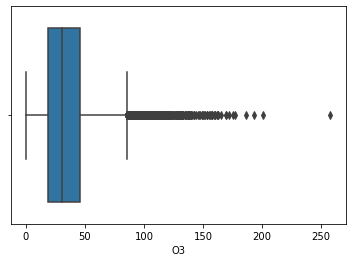

In [47]:
sns.boxplot(df['O3'])

<AxesSubplot:xlabel='Benzene'>

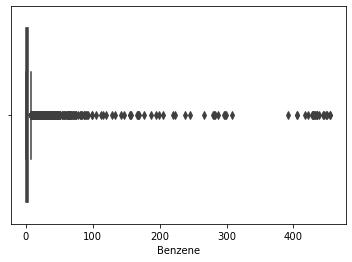

In [48]:
sns.boxplot(df['Benzene'])

<AxesSubplot:xlabel='Toluene'>

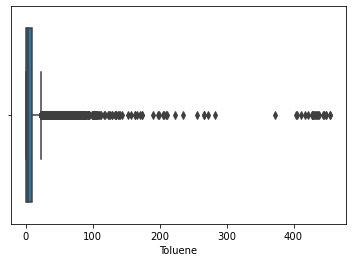

In [49]:
sns.boxplot(df['Toluene'])

<AxesSubplot:xlabel='Xylene'>

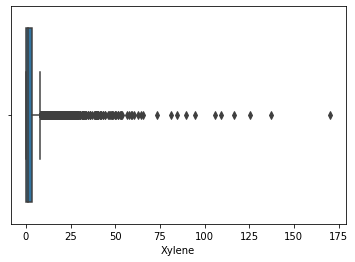

In [50]:
sns.boxplot(df['Xylene'])

<AxesSubplot:xlabel='AQI'>

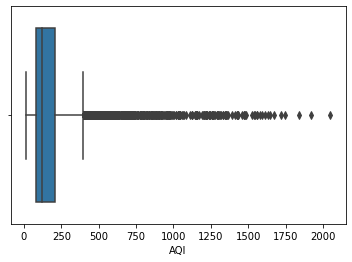

In [51]:
sns.boxplot(df['AQI'])

<AxesSubplot:xlabel='Year'>

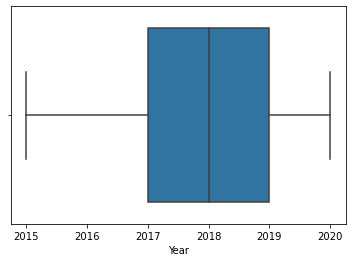

In [52]:
sns.boxplot(df['Year'])

In [53]:
df.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year
PM2.5,1.000000,0.846498,0.433491,0.350709,0.436792,0.275086,0.089912,0.132325,0.161238,0.023911,0.117080,0.114579,0.659181,-0.229562
PM10,0.846498,1.000000,0.502349,0.464380,0.527768,0.376816,0.112588,0.256974,0.244919,0.022265,0.169335,0.081700,0.803313,-0.217182
NO,0.433491,0.502349,1.000000,0.478070,0.794890,0.185621,0.212607,0.170322,0.014580,0.035771,0.150857,0.094237,0.452191,-0.016900
NO2,0.350709,0.464380,0.478070,1.000000,0.627627,0.234938,0.356521,0.392233,0.293349,0.025260,0.273926,0.171701,0.537071,-0.066266
NOx,0.436792,0.527768,0.794890,0.627627,1.000000,0.166224,0.226992,0.238397,0.093170,0.039121,0.189386,0.087398,0.486450,-0.017956
NH3,0.275086,0.376816,0.185621,0.234938,0.166224,1.000000,0.104891,-0.038998,0.094972,-0.015650,0.013227,-0.019813,0.252019,-0.245343
CO,0.089912,0.112588,0.212607,0.356521,0.226992,0.104891,1.000000,0.489697,0.041736,0.061861,0.277904,0.154889,0.683346,-0.062637
SO2,0.132325,0.256974,0.170322,0.392233,0.238397,-0.038998,0.489697,1.000000,0.162142,0.036110,0.296139,0.251195,0.490586,0.040556
O3,0.161238,0.244919,0.014580,0.293349,0.093170,0.094972,0.041736,0.162142,1.000000,0.020255,0.130209,0.111410,0.198991,-0.019888
Benzene,0.023911,0.022265,0.035771,0.025260,0.039121,-0.015650,0.061861,0.036110,0.020255,1.000000,0.739286,0.415427,0.044407,0.040542


In [54]:
df.corr(method='pearson')

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year
PM2.5,1.000000,0.846498,0.433491,0.350709,0.436792,0.275086,0.089912,0.132325,0.161238,0.023911,0.117080,0.114579,0.659181,-0.229562
PM10,0.846498,1.000000,0.502349,0.464380,0.527768,0.376816,0.112588,0.256974,0.244919,0.022265,0.169335,0.081700,0.803313,-0.217182
NO,0.433491,0.502349,1.000000,0.478070,0.794890,0.185621,0.212607,0.170322,0.014580,0.035771,0.150857,0.094237,0.452191,-0.016900
NO2,0.350709,0.464380,0.478070,1.000000,0.627627,0.234938,0.356521,0.392233,0.293349,0.025260,0.273926,0.171701,0.537071,-0.066266
NOx,0.436792,0.527768,0.794890,0.627627,1.000000,0.166224,0.226992,0.238397,0.093170,0.039121,0.189386,0.087398,0.486450,-0.017956
NH3,0.275086,0.376816,0.185621,0.234938,0.166224,1.000000,0.104891,-0.038998,0.094972,-0.015650,0.013227,-0.019813,0.252019,-0.245343
CO,0.089912,0.112588,0.212607,0.356521,0.226992,0.104891,1.000000,0.489697,0.041736,0.061861,0.277904,0.154889,0.683346,-0.062637
SO2,0.132325,0.256974,0.170322,0.392233,0.238397,-0.038998,0.489697,1.000000,0.162142,0.036110,0.296139,0.251195,0.490586,0.040556
O3,0.161238,0.244919,0.014580,0.293349,0.093170,0.094972,0.041736,0.162142,1.000000,0.020255,0.130209,0.111410,0.198991,-0.019888
Benzene,0.023911,0.022265,0.035771,0.025260,0.039121,-0.015650,0.061861,0.036110,0.020255,1.000000,0.739286,0.415427,0.044407,0.040542


In [55]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000,29531.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581,2017.887914
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585,1.533783
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,2015.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000,2017.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000,2018.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000,2019.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000,2020.000000


<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

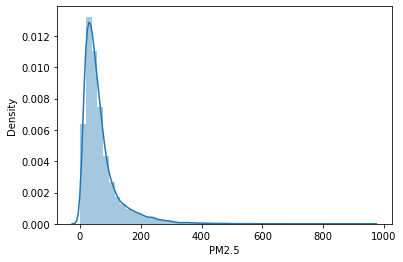

In [56]:
sns.distplot(df['PM2.5'].dropna())

<AxesSubplot:xlabel='PM10', ylabel='Density'>

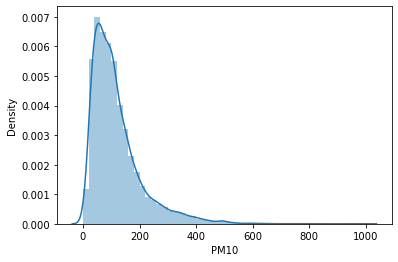

In [57]:
sns.distplot(df['PM10'].dropna())

<AxesSubplot:xlabel='NO', ylabel='Density'>

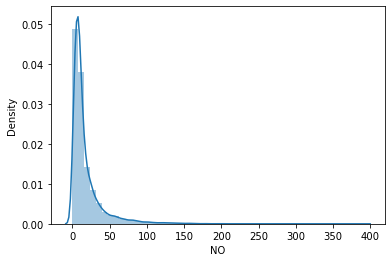

In [58]:
sns.distplot(df['NO'].dropna())

<AxesSubplot:xlabel='O3', ylabel='Density'>

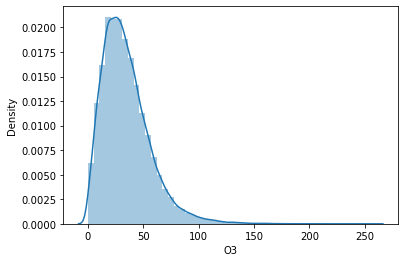

In [59]:
sns.distplot(df['O3'].dropna())

<AxesSubplot:xlabel='Year', ylabel='Density'>

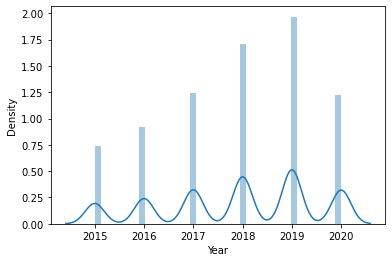

In [60]:
sns.distplot(df['Year'].dropna())

<AxesSubplot:xlabel='AQI', ylabel='Density'>

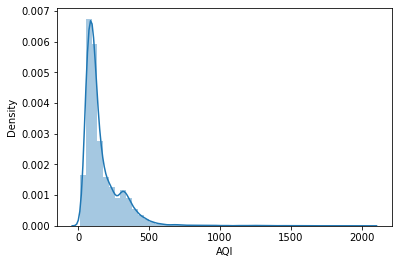

In [61]:
sns.distplot(df['AQI'].dropna())

<AxesSubplot:xlabel='Benzene', ylabel='Density'>

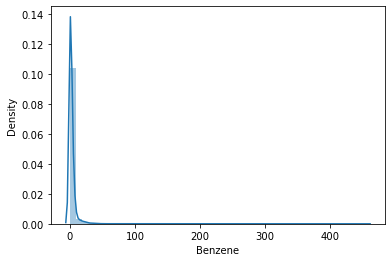

In [62]:
sns.distplot(df['Benzene'].dropna())

<AxesSubplot:xlabel='Xylene', ylabel='Density'>

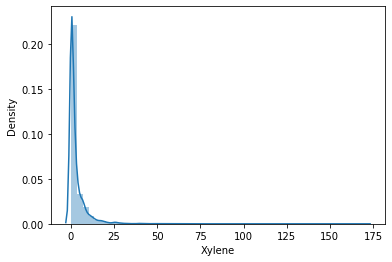

In [63]:
sns.distplot(df['Xylene'].dropna())

<AxesSubplot:xlabel='Benzene', ylabel='Density'>

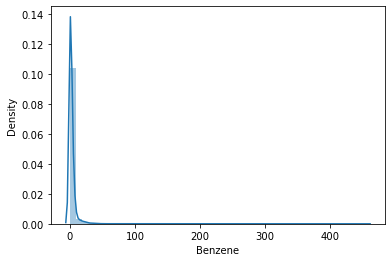

In [64]:
sns.distplot(df['Benzene'].dropna())

In [65]:
df.corr(method='pearson')

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year
PM2.5,1.000000,0.846498,0.433491,0.350709,0.436792,0.275086,0.089912,0.132325,0.161238,0.023911,0.117080,0.114579,0.659181,-0.229562
PM10,0.846498,1.000000,0.502349,0.464380,0.527768,0.376816,0.112588,0.256974,0.244919,0.022265,0.169335,0.081700,0.803313,-0.217182
NO,0.433491,0.502349,1.000000,0.478070,0.794890,0.185621,0.212607,0.170322,0.014580,0.035771,0.150857,0.094237,0.452191,-0.016900
NO2,0.350709,0.464380,0.478070,1.000000,0.627627,0.234938,0.356521,0.392233,0.293349,0.025260,0.273926,0.171701,0.537071,-0.066266
NOx,0.436792,0.527768,0.794890,0.627627,1.000000,0.166224,0.226992,0.238397,0.093170,0.039121,0.189386,0.087398,0.486450,-0.017956
NH3,0.275086,0.376816,0.185621,0.234938,0.166224,1.000000,0.104891,-0.038998,0.094972,-0.015650,0.013227,-0.019813,0.252019,-0.245343
CO,0.089912,0.112588,0.212607,0.356521,0.226992,0.104891,1.000000,0.489697,0.041736,0.061861,0.277904,0.154889,0.683346,-0.062637
SO2,0.132325,0.256974,0.170322,0.392233,0.238397,-0.038998,0.489697,1.000000,0.162142,0.036110,0.296139,0.251195,0.490586,0.040556
O3,0.161238,0.244919,0.014580,0.293349,0.093170,0.094972,0.041736,0.162142,1.000000,0.020255,0.130209,0.111410,0.198991,-0.019888
Benzene,0.023911,0.022265,0.035771,0.025260,0.039121,-0.015650,0.061861,0.036110,0.020255,1.000000,0.739286,0.415427,0.044407,0.040542


<AxesSubplot:>

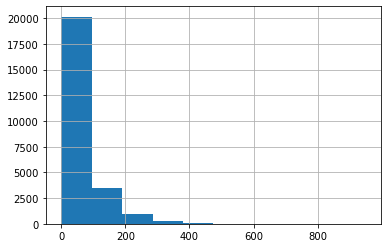

In [66]:
df['PM2.5'].hist(bins=10)

<AxesSubplot:>

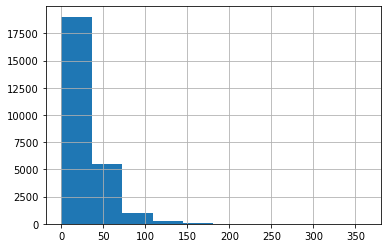

In [67]:
df['NO2'].hist(bins=10)

In [68]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
Year              0
dtype: int64

In [69]:
df['PM2.5'] = df['PM2.5'].fillna(df['PM2.5'].mean())
df['PM10'] = df['PM10'].fillna(df['PM10'].mean())
df['NO'] = df['NO'].fillna(df['NO'].mean())
df['NO2'] = df['NO2'].fillna(df['NO2'].mean())
df['NOx'] = df['NOx'].fillna(df['NOx'].mean())
df['NH3'] = df['NH3'].fillna(df['NH3'].mean())
df['CO'] = df['CO'].fillna(df['CO'].mean())
df['SO2'] = df['SO2'].fillna(df['SO2'].mean())
df['O3'] = df['O3'].fillna(df['O3'].mean())
df['Benzene'] = df['Benzene'].fillna(df['Benzene'].mean())
df['Toluene'] = df['Toluene'].fillna(df['Toluene'].mean())
df['AQI'] = df['AQI'].fillna(df['AQI'].mean())

In [70]:
df['Xylene'] = df['Xylene'].fillna(df['Xylene'].mean())

In [71]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
Year             0
dtype: int64

In [72]:
df.corr(method='pearson')

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year
PM2.5,1.000000,0.558079,0.426375,0.344341,0.380725,0.189227,0.086663,0.119512,0.155330,0.021934,0.107788,0.070459,0.628860,-0.205133
PM10,0.558079,1.000000,0.431006,0.359165,0.415133,0.223025,0.047517,0.176188,0.203595,0.019215,0.121983,0.031256,0.484497,-0.143425
NO,0.426375,0.431006,1.000000,0.462402,0.746223,0.156394,0.211639,0.166190,0.014218,0.033901,0.134201,0.059494,0.430600,-0.015737
NO2,0.344341,0.359165,0.462402,1.000000,0.574190,0.165984,0.353237,0.382758,0.285448,0.025082,0.254074,0.133037,0.522994,-0.061678
NOx,0.380725,0.415133,0.746223,0.574190,1.000000,0.128051,0.225097,0.208355,0.083063,0.037383,0.168780,0.056920,0.438363,-0.017076
NH3,0.189227,0.223025,0.156394,0.165984,0.128051,1.000000,0.020029,-0.021005,0.078688,-0.011864,0.007442,-0.002215,0.137436,-0.183219
CO,0.086663,0.047517,0.211639,0.353237,0.225097,0.020029,1.000000,0.472583,0.039787,0.061351,0.274882,0.145190,0.649679,-0.060840
SO2,0.119512,0.176188,0.166190,0.382758,0.208355,-0.021005,0.472583,1.000000,0.156610,0.033059,0.265522,0.203766,0.452768,0.037703
O3,0.155330,0.203595,0.014218,0.285448,0.083063,0.078688,0.039787,0.156610,1.000000,0.018748,0.113683,0.068016,0.188590,-0.018367
Benzene,0.021934,0.019215,0.033901,0.025082,0.037383,-0.011864,0.061351,0.033059,0.018748,1.000000,0.694691,0.092957,0.041518,0.036206


In [73]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,NaN,2015
1,Ahmedabad,2015-02-01,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,NaN,2015
2,Ahmedabad,2015-03-01,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,NaN,2015
3,Ahmedabad,2015-04-01,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,NaN,2015
4,Ahmedabad,2015-05-01,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,Good,2020
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,Satisfactory,2020
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,Satisfactory,2020
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,Satisfactory,2020


In [74]:
df1 = df.drop(columns=['AQI_Bucket','Date','Year','Benzene','Toluene','Xylene','NO','NO2'],axis=1)

In [75]:
df1

,City,PM2.5,PM10,NOx,NH3,CO,SO2,O3,AQI
0,Ahmedabad,67.450578,118.127103,17.15,23.483476,0.92,27.64,133.36,166.463581
1,Ahmedabad,67.450578,118.127103,16.46,23.483476,0.97,24.55,34.06,166.463581
2,Ahmedabad,67.450578,118.127103,29.70,23.483476,17.40,29.07,30.70,166.463581
3,Ahmedabad,67.450578,118.127103,17.97,23.483476,1.70,18.59,36.08,166.463581
4,Ahmedabad,67.450578,118.127103,37.76,23.483476,22.10,39.33,39.31,166.463581
...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.020000,50.940000,19.54,12.470000,0.47,8.55,23.30,41.000000
29527,Visakhapatnam,24.380000,74.090000,16.53,11.990000,0.52,12.72,30.14,70.000000
29528,Visakhapatnam,22.910000,65.730000,18.33,10.710000,0.48,8.42,30.96,68.000000
29529,Visakhapatnam,16.640000,49.970000,18.80,10.030000,0.52,9.84,28.30,54.000000


In [76]:
df1.isnull().sum()

City     0
PM2.5    0
PM10     0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

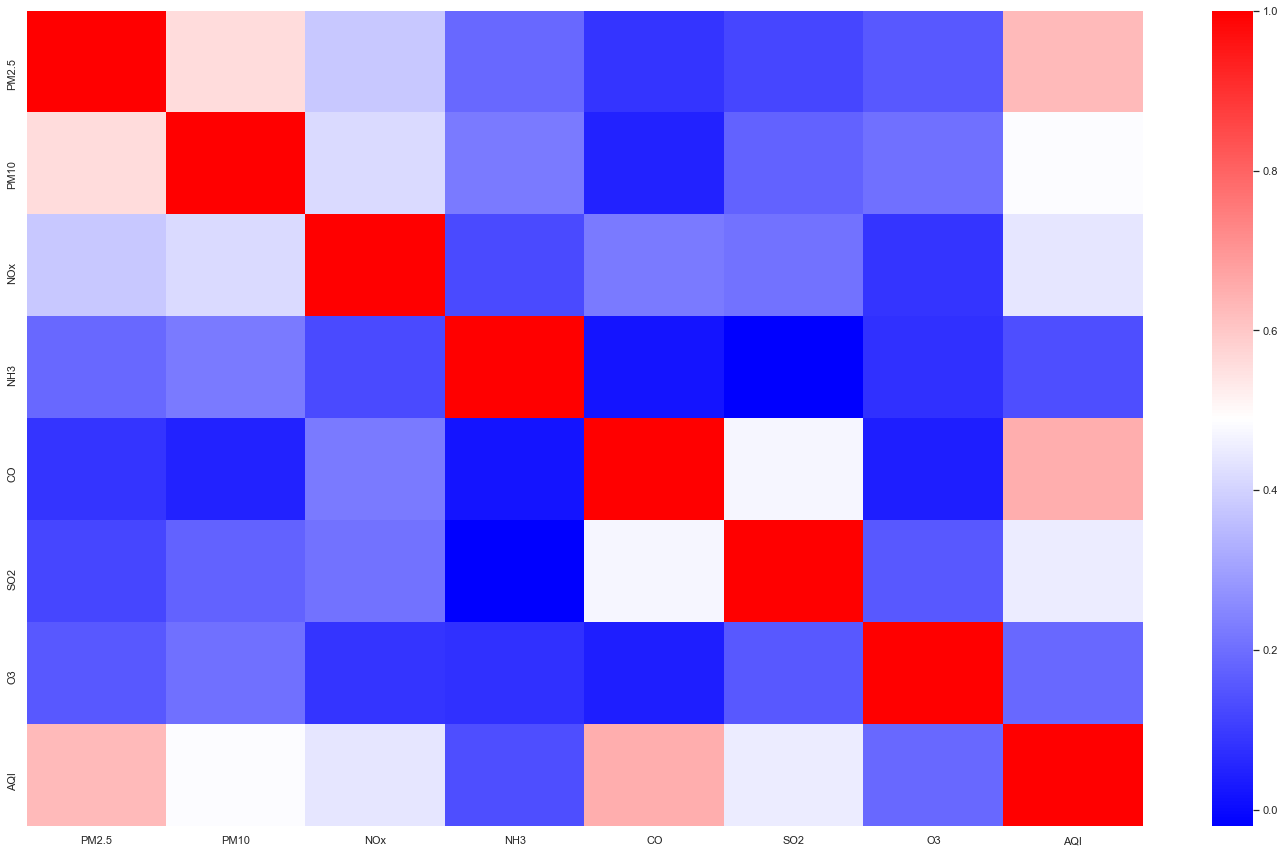

In [77]:
sns.set(rc ={'figure.figsize':(25,15)})
correlation = df1.corr()
sns.heatmap(correlation, cmap='bwr')
plt.show()

In [79]:
df1

,City,PM2.5,PM10,NOx,NH3,CO,SO2,O3,AQI
0,Ahmedabad,67.450578,118.127103,17.15,23.483476,0.92,27.64,133.36,166.463581
1,Ahmedabad,67.450578,118.127103,16.46,23.483476,0.97,24.55,34.06,166.463581
2,Ahmedabad,67.450578,118.127103,29.70,23.483476,17.40,29.07,30.70,166.463581
3,Ahmedabad,67.450578,118.127103,17.97,23.483476,1.70,18.59,36.08,166.463581
4,Ahmedabad,67.450578,118.127103,37.76,23.483476,22.10,39.33,39.31,166.463581
...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.020000,50.940000,19.54,12.470000,0.47,8.55,23.30,41.000000
29527,Visakhapatnam,24.380000,74.090000,16.53,11.990000,0.52,12.72,30.14,70.000000
29528,Visakhapatnam,22.910000,65.730000,18.33,10.710000,0.48,8.42,30.96,68.000000
29529,Visakhapatnam,16.640000,49.970000,18.80,10.030000,0.52,9.84,28.30,54.000000


In [82]:
X = df1.drop(['AQI','City'], axis=1)
y = df1['AQI']

In [83]:
X

,PM2.5,PM10,NOx,NH3,CO,SO2,O3
0,67.450578,118.127103,17.15,23.483476,0.92,27.64,133.36
1,67.450578,118.127103,16.46,23.483476,0.97,24.55,34.06
2,67.450578,118.127103,29.70,23.483476,17.40,29.07,30.70
3,67.450578,118.127103,17.97,23.483476,1.70,18.59,36.08
4,67.450578,118.127103,37.76,23.483476,22.10,39.33,39.31
...,...,...,...,...,...,...,...
29526,15.020000,50.940000,19.54,12.470000,0.47,8.55,23.30
29527,24.380000,74.090000,16.53,11.990000,0.52,12.72,30.14
29528,22.910000,65.730000,18.33,10.710000,0.48,8.42,30.96
29529,16.640000,49.970000,18.80,10.030000,0.52,9.84,28.30


In [84]:
y

0        166.463581
1        166.463581
2        166.463581
3        166.463581
4        166.463581
            ...    
29526     41.000000
29527     70.000000
29528     68.000000
29529     54.000000
29530     50.000000
Name: AQI, Length: 29531, dtype: float64

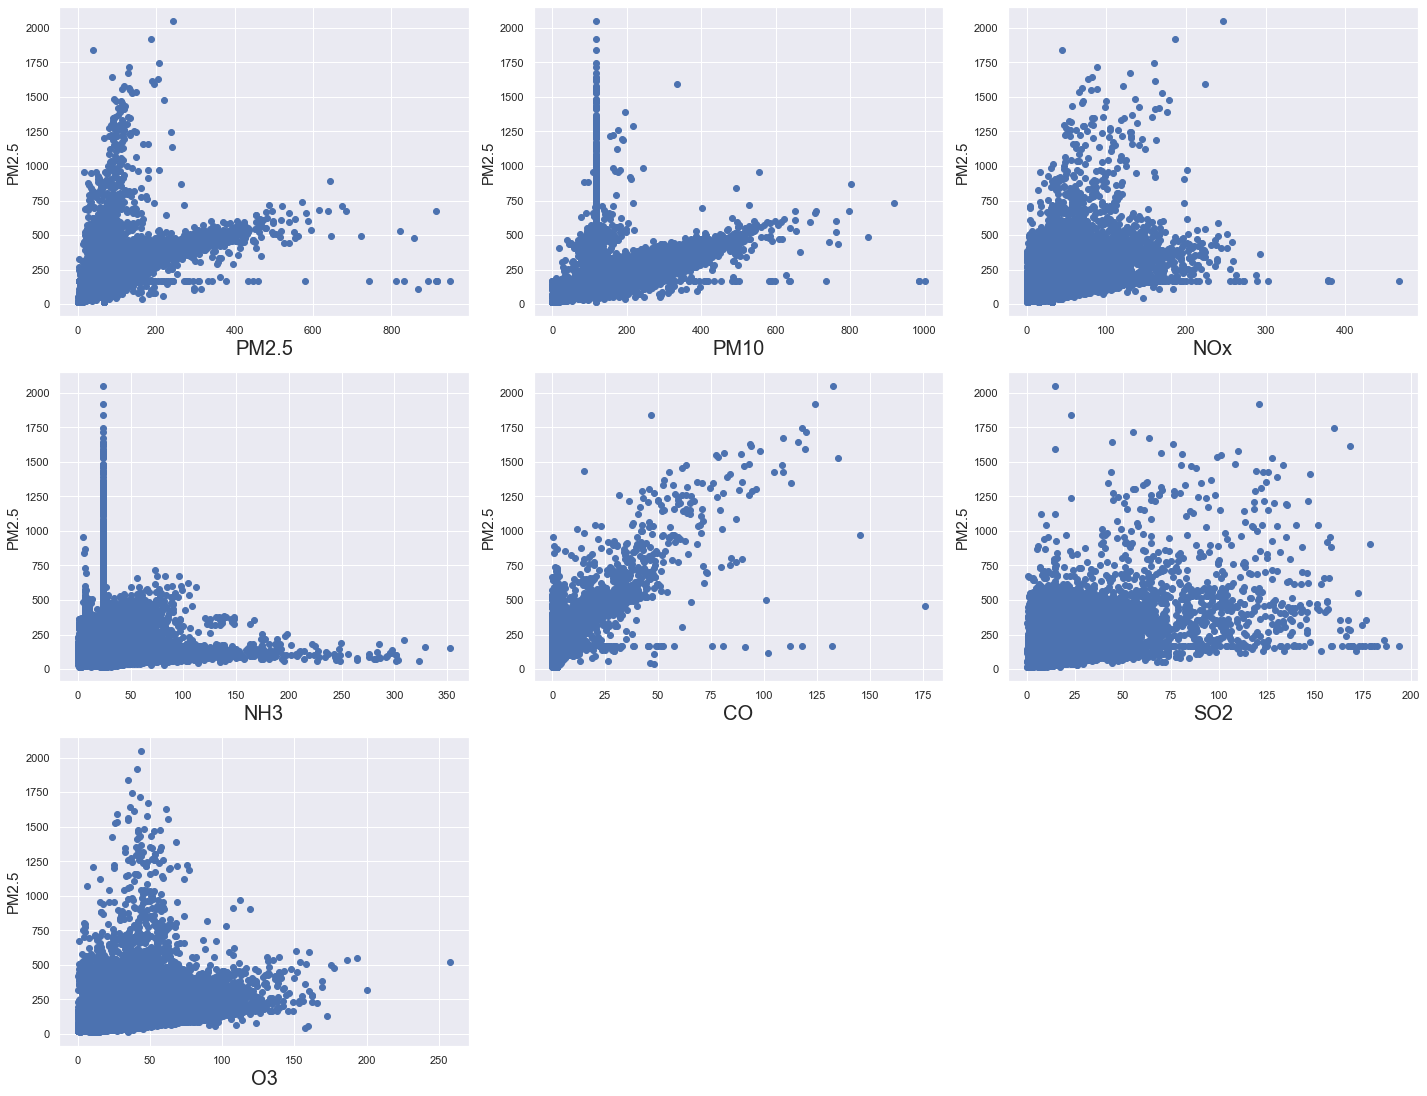

In [85]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for col in X:
    if plotnumber <=12:
        ax=plt.subplot(6,3,plotnumber)
        plt.scatter(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('PM2.5',fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [86]:
scaler = StandardScaler()

In [87]:
x_scaled = scaler.fit_transform(X)

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=45)

In [89]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [90]:
regression.coef_

array([59.00616039, 20.50014181,  6.7146491 , -0.62692648, 72.67297988,
       10.41935148,  5.53708262])

In [91]:
regression.score(x_train,y_train)

0.7951134081192375

In [92]:
regression.score(x_test,y_test)

0.779410512101597

In [93]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [94]:
adj_r2(x_train,y_train)

0.7950439987332255

In [95]:
adj_r2(x_test,y_test)

0.779236073961596

In [167]:
x_scaled.T

array([[-4.78371477e-15, -4.78371477e-15, -4.78371477e-15, ...,
        -7.49671378e-01, -8.55203003e-01, -8.82806171e-01],
       [-3.18006285e-15, -3.18006285e-15, -3.18006285e-15, ...,
        -7.32829252e-01, -9.53249626e-01, -7.29053015e-01],
       [-5.17068453e-01, -5.40603932e-01, -8.89956058e-02, ...,
        -4.76819372e-01, -4.60787959e-01, -6.22807562e-01],
       ...,
       [-1.97836459e-01, -1.90391151e-01,  2.25613707e+00, ...,
        -2.63355169e-01, -2.57398923e-01, -2.46975492e-01],
       [ 7.75218914e-01,  5.92473851e-01,  8.59790254e-01, ...,
        -3.61467207e-01, -2.77487275e-01, -7.35237045e-01],
       [ 4.90344046e+00, -2.13970290e-02, -1.88038056e-01, ...,
        -1.75143214e-01, -3.07067361e-01, -8.65017227e-01]])

In [171]:
x_scaled[[0]]

array([[-4.78371477e-15, -3.18006285e-15, -5.17068453e-01,
         1.71537368e-16, -1.97836459e-01,  7.75218914e-01,
         4.90344046e+00]])

In [172]:
regression.predict([[-4.78371477e-15, -3.18006285e-15, -5.17068453e-01,
         1.71537368e-16, -1.97836459e-01,  7.75218914e-01,
         4.90344046e+00]])

array([183.70155753])

In [173]:
y

0        166.463581
1        166.463581
2        166.463581
3        166.463581
4        166.463581
            ...    
29526     41.000000
29527     70.000000
29528     68.000000
29529     54.000000
29530     50.000000
Name: AQI, Length: 29531, dtype: float64

In [96]:
lasscv=LassoCV(alphas=None,cv=10,max_iter=100000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [97]:
alpha=lasscv.alpha_
alpha

0.00059060907910321

In [98]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.00059060907910321)

In [99]:
lasso_reg.score(x_train,y_train)

0.7951134080217679

In [100]:
lasso_reg.score(x_test,y_test)

0.779410698403

In [101]:
import numpy as np

In [102]:
alphas=np.random.uniform(low=0,high=10,size=(50,))
ridge_cv=RidgeCV(alphas=alphas,cv=10,normalize=True)
ridge_cv.fit(x_train,y_train)

RidgeCV(alphas=array([3.99847678, 4.38006632, 9.058896  , 5.25892323, 1.15830861,
       6.51425108, 8.66415728, 4.27243231, 1.39449026, 9.47091609,
       2.11420813, 4.51967534, 0.83312673, 7.4065748 , 4.64632684,
       8.67632581, 2.97443564, 3.16885946, 8.25001687, 0.88748313,
       6.38673746, 6.92902466, 8.27610371, 2.14462352, 2.47249108,
       1.72374101, 1.01725554, 1.57474628, 7.65577701, 9.51968372,
       1.64009941, 5.50141731, 4.12149224, 4.85848269, 9.87036701,
       1.25930946, 4.18702717, 9.52874731, 7.49023689, 8.91709006,
       7.25197224, 0.9235736 , 2.57726021, 8.75095336, 9.2278528 ,
       2.37932903, 2.93871613, 8.3882553 , 4.21421402, 4.42527962]),
        cv=10, normalize=True)

In [103]:
ridge_cv.alpha_

0.8331267340447079

In [104]:
ridge_model=Ridge(alpha=ridge_cv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.8331267340447079)

In [105]:
ridge_model.score(x_train,y_train)

0.7951134071144315

In [106]:
ridge_model.score(x_test,y_test)

0.7794134663119361

In [107]:
elastic_cv=ElasticNetCV(alphas=None,cv=586)
elastic_cv.fit(x_train,y_train)

ElasticNetCV(cv=586)

In [108]:
elastic_cv.alpha_

0.1683217231082773

In [109]:
elastic_cv.l1_ratio

0.5

In [110]:
elastic_reg=ElasticNet(alpha=elastic_cv.alpha_,l1_ratio=0.5)
elastic_reg.fit(x_train,y_train)

ElasticNet(alpha=0.1683217231082773)

In [111]:
elastic_reg.score(x_train,y_train)

0.7916059969641019

In [112]:
elastic_reg.score(x_test,y_test)

0.7808908161411541

In [113]:
parameters = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001]} 

In [114]:
gscv = GridSearchCV(lasso_reg, param_grid=parameters, cv=30)

In [115]:
gscv.fit(x_train, y_train)

GridSearchCV(cv=30, estimator=Lasso(alpha=0.00059060907910321),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001]})

In [116]:
gscv.best_params_['alpha']

0.1

In [117]:
gscv.best_params_['alpha']

0.1

In [118]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=30, estimator=Lasso(alpha=0.00059060907910321),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001]})

In [119]:
gscv.score(x_train,y_train)

0.7951106369930594

In [120]:
gscv.score(x_test,y_test)

0.7794391473209725

## Random Forest

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [122]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=20)

In [123]:
Random_clf = RandomForestRegressor(n_estimators=115,random_state=16)

In [124]:
Random_clf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=115, random_state=16)

In [125]:
Random_clf.score(x_train,y_train)

0.9816371252454338

In [126]:
Random_clf.score(x_test,y_test)

0.8745085063387008

In [174]:
Random_clf.predict([[-4.78371477e-15, -3.18006285e-15, -5.17068453e-01,
         1.71537368e-16, -1.97836459e-01,  7.75218914e-01,
         4.90344046e+00]])

array([167.42930986])

## Hyperparameter Tunning

In [127]:
Random_clf = RandomForestRegressor(criterion = 'mae',max_depth = 15,max_features = 'auto',min_samples_leaf = 5,min_samples_split=5
                                 ,n_estimators=100,random_state=10,n_jobs =-1)

In [128]:
Random_clf.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=15, min_samples_leaf=5,
                      min_samples_split=5, n_jobs=-1, random_state=10)

In [129]:
Random_clf.score(x_train,y_train)

0.901759118183102

In [130]:
Random_clf.score(x_test,y_test)

0.8704013913191224

In [131]:
y_pred = Random_clf.predict(x_test)

In [132]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_auc_score,mean_absolute_error

In [133]:
from sklearn import metrics

In [134]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 21.414209727666243
Mean Squared Error: 2189.6850216260505
Root Mean Squared Error: 46.79407036822134


In [135]:
def adj_r2(x,y):
    r2 = Random_clf.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [136]:
Random_clf.score(x_train,y_train)

0.901759118183102

In [137]:
Random_clf.score(x_test,y_test)

0.8704013913191224

## decission tree

In [138]:
from sklearn.tree import DecisionTreeRegressor

In [139]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=45)

In [140]:
dtc = DecisionTreeRegressor()

In [141]:
dtc.fit(x_train,y_train)

DecisionTreeRegressor()

In [142]:
dtc.score(x_train,y_train)

0.9992839247461242

In [143]:
dtc.score(x_test,y_test)

0.7377113557864492

## bagging Technique

In [144]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [145]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=10)

In [146]:
knn = KNeighborsRegressor(n_neighbors = 30)

In [147]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=30)

In [148]:
knn.score(x_train,y_train)

0.8574818543145273

In [149]:
knn.score(x_test,y_test)

0.8383351810182099

In [150]:
bag_knn = BaggingRegressor(KNeighborsRegressor(n_neighbors=30),n_estimators=10,max_samples = 0.5,bootstrap=True,random_state=3,oob_score=True)

In [151]:
bag_knn.fit(x_train,y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=30),
                 max_samples=0.5, oob_score=True, random_state=3)

In [152]:
bag_knn.score(x_train,y_train)

0.8422271266708203

In [153]:
bag_knn.score(x_test,y_test)

0.8325004265094502

In [154]:
def adj_r2(x,y):
    r2 = bag_knn.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [155]:
adj_r2(x_train,y_train)

0.8421736779889588

In [156]:
adj_r2(x_test,y_test)

0.8323679709045662